# Assignment: Working with Data

>Using the data below, answer the following questions:

>1) Which entities (top 5) had the largest population density in 2020?
>2) Which entities have more water area than land area?
>3) Which entities increased in population the most in the last 10 years?
>4) What state bird accounts for the largest population as of 2020? Land area?
>5) How many entities' largest city is their capital city?
>6) Which city has the largest percent drop from their largest city to their 5th largest? 100*(1st largest - 5th largest)/(1st largest)

In [29]:
import pandas as pd

In [30]:
facts = pd.read_csv('../data/state_facts.tsv',delimiter="\t")
facts.head()

,State,Area_tot,Area_land,Area_water,Pop_2020,Pop_2010,Rep_seats,State_bird,State_flower,State_motto,...,City_1,city_1_pop,City_2,city_2_pop,City_3,city_3_pop,City_4,city_4_pop,City_5,city_5_pop
0,Alabama,135767,131171,4597,5024279.0,4779736,7,Yellowhammer (Northern flicker),Camellia,Audemus jura nostra defendere,...,Birmingham,208928,Huntsville,204189.0,Montgomery,198956.0,Mobile,189572.0,Tuscaloosa,101113.0
1,Alaska,1723337,1477953,245384,733391.0,710231,1,Willow ptarmigan,Forget-me-not,North to the Future,...,Anchorage,291538,Juneau,32197.0,Fairbanks,31516.0,Wasilla,10529.0,Sitka,8647.0
2,American Samoa,1505,198,1307,49437.0,55519,1*,None,Paogo (Ulafala),"Samoa, Muamua Le Atua",...,Tafuna,7945,Nu'uuli,3955.0,Pago Pago,3656.0,'Ili'ili,3195.0,Pava'ia'i,2450.0
3,Arizona,295234,294207,1026,7151502.0,6392017,9,Cactus wren,Saguaro cactus blossom,Ditat Deus,...,Phoenix,1660272,Tucson,545975.0,Mesa,508958.0,Chandler,257165.0,Scottsdale,255310.0
4,Arkansas,137732,134771,2961,3011524.0,2915918,4,Northern mockingbird,Apple blossom,Regnat populus,...,Little Rock,197881,Fort Smith,87845.0,Fayetteville,86751.0,Springdale,81029.0,Jonesboro,76990.0


In [31]:
facts.columns

Index(['State', 'Area_tot', 'Area_land', 'Area_water', 'Pop_2020', 'Pop_2010',
       'Rep_seats', 'State_bird', 'State_flower', 'State_motto', 'Motto_trans',
       'USPS_code', 'GDP_2020', 'GDP_2019', 'Capital', 'Capital_pop', 'City_1',
       'city_1_pop', 'City_2', 'city_2_pop', 'City_3', 'city_3_pop', 'City_4',
       'city_4_pop', 'City_5', 'city_5_pop'],
      dtype='object')

In [60]:
#1
Pop_density = facts["Pop_2020"]/facts["Area_land"]
density = pd.DataFrame({'State':facts['State'],'Pop_density':Pop_density})
facts1 = density.sort_values(by=['Pop_density'],ascending=False)
facts1.head(5)

,State,Pop_density
9,District of Columbia,4364.208861
32,New Jersey,487.688035
43,Rhode Island,409.775579
42,Puerto Rico,370.531574
23,Massachusetts,347.981239


In [344]:
#2
More_water =  (facts['Area_water']>facts["Area_land"])
water = pd.DataFrame({'State':facts['State'],'More_water':More_water})
facts2 = water.sort_values(by=['More_water'],ascending=False)
facts2.head(4)

,State,More_water
2,american samoa,True
48,united states virgin islands,True
37,northern mariana islands,True
12,guam,True


In [54]:
#3
Pop_increase = facts["Pop_2020"] - facts["Pop_2010"]
increase = pd.DataFrame({'State':facts['State'],'Pop_increase':Pop_increase})
facts3 = increase.sort_values(by = "Pop_increase",ascending = False)
facts3.head()

,State,Pop_increase
47,Texas,3999944.0
10,Florida,2736877.0
5,California,2284267.0
11,Georgia,1024255.0
52,Washington,980741.0


In [80]:
#4
cols = ["State","State_bird","Pop_2020","Area_land"]
facts4 =pd.DataFrame(facts, columns = cols)

In [346]:
Bird_pop = facts4.sort_values(by = "Pop_2020",ascending = False)
Bird_pop.head(1).drop(columns=['Area_land'])


,State,State_bird,Pop_2020
5,California,California quail,39538223.0


In [347]:
Bird_area = facts4.sort_values(by = "Area_land",ascending = False)
Bird_area.head(1).drop(columns=['Pop_2020'])

,State,State_bird,Area_land
1,Alaska,Willow ptarmigan,1477953


In [184]:
#5
cols = ["State",'Capital_pop','city_1_pop','city_2_pop','city_3_pop','city_4_pop','city_5_pop']
facts5 = pd.DataFrame(facts, columns = cols)
facts5.head()

,State,Capital_pop,city_1_pop,city_2_pop,city_3_pop,city_4_pop,city_5_pop
0,Alabama,198525,208928,204189.0,198956.0,189572.0,101113.0
1,Alaska,32113,291538,32197.0,31516.0,10529.0,8647.0
2,American Samoa,3656,7945,3955.0,3656.0,3195.0,2450.0
3,Arizona,1680992,1660272,545975.0,508958.0,257165.0,255310.0
4,Arkansas,197312,197881,87845.0,86751.0,81029.0,76990.0


In [156]:
cpgt = (facts['Capital_pop']>=facts['city_1_pop'])&(facts['Capital_pop']>=facts['city_2_pop'])&(facts['Capital_pop']>=facts['city_3_pop'])&(facts['Capital_pop']>=facts['city_4_pop'])&(facts['Capital_pop']>=facts['city_5_pop'])
capital_pop = pd.DataFrame({'State':facts['State'],'cpgt':cpgt})
Facts5 = capital_pop.sort_values(by=['cpgt'],ascending=False)
Facts5.head()

,State,cpgt
55,Wyoming,True
43,Rhode Island,True
16,Indiana,True
14,Idaho,True
39,Oklahoma,True


In [164]:
Factss5 = Facts5["cpgt"].sum()
print("The number of entities whos largest city is their capital is",Factss5)

The number of entities whos largest city is their capital is 11


In [171]:
#6
facts5.head()

,State,Capital_pop,city_1_pop,city_2_pop,city_3_pop,city_4_pop,city_5_pop
0,Alabama,198525,208928,204189.0,198956.0,189572.0,101113.0
1,Alaska,32113,291538,32197.0,31516.0,10529.0,8647.0
2,American Samoa,3656,7945,3955.0,3656.0,3195.0,2450.0
3,Arizona,1680992,1660272,545975.0,508958.0,257165.0,255310.0
4,Arkansas,197312,197881,87845.0,86751.0,81029.0,76990.0


In [191]:
Percentage_increase = 100*(facts5["city_1_pop"] - facts["city_5_pop"])/facts5["city_1_pop"]
percentage = pd.DataFrame({'State':facts['State'],'Percentage_increase':Percentage_increase})
facts6 = percentage.sort_values(by=['Percentage_increase'],ascending=False)
facts6.head(1)

,State,Percentage_increase
34,New York,98.392453


>Using the "state_dates.tsv" data, answer the remaining questions. You will need to merge the two data sets together:

>7) Of the states that joined the United States before 1790, what is the most common state flower?
>8) Which has the larger population density, the most dense US Territory or the least dense state?
>9) Make a graph that plots the populations of the largest city in each entity in the order in which they joined the US. Make the bars black
>10) Make two additional graphs like the one above but one for land area (green bars) and one for water area (blue bars)

In [315]:
#7
dates = pd.read_csv('../data/state_dates.tsv',delimiter="\t")
dates["Name" ] = dates["Name"].str.lower()
facts["State"] = facts ["State"].str.lower()
dates[ "Name"] = dates ["Name"].str.strip()
facts["State"]= facts["State"].str.strip()
dates.Date = pd.to_datetime (dates ['Date'])
merged= dates.merge(facts, left_on='Name', right_on='State', how='inner')

In [316]:
cols = ["State",'Date','State_flower']
facts7 = pd.DataFrame(merged, columns = cols)
facts7.head()

,State,Date,State_flower
0,alabama,1819-12-14,Camellia
1,alaska,1959-01-03,Forget-me-not
2,american samoa,1900-04-17,Paogo (Ulafala)
3,arizona,1912-02-14,Saguaro cactus blossom
4,arkansas,1836-06-15,Apple blossom


In [319]:
facts7[facts7['Date']<pd.datetime(1790,1,1)]['State_flower'].value_counts().head(1)

/var/folders/wx/pnzp2mcx6dn3bpbrl16v7f3w0000gn/T/ipykernel_3818/2078879324.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  facts7[facts7['Date']<pd.datetime(1790,1,1)]['State_flower'].value_counts().head(1)


Mountain laurel    2
Name: State_flower, dtype: int64

In [327]:
#8
merged["Status"].value_counts()
most_dense = merged [merged ['Status'] == 'Territory']
territory = most_dense.sort_values (by='Pop_2020', ascending =False)
territory.head(1)

,Name,Date,Status,Abbreviation,State,Area_tot,Area_land,Area_water,Pop_2020,Pop_2010,...,city_1_pop,City_2,city_2_pop,City_3,city_3_pop,City_4,city_4_pop,City_5,city_5_pop,Pop_increase
42,puerto rico,1899-04-11,Territory,PR,puerto rico,13791,8868,4924,3285874.0,3725789,...,320967,Bayamón,170480.0,Carolina,147661.0,Ponce,133191.0,Caguas,124434.0,-439915.0


Hint: `pd.read_csv('../data/state_dates.tsv',delimiter="\t")`

Hint: You likely want to convert the Date column to datetime. You might have to correct errors in the data as well.

Hint: `states['Date']<pd.datetime(1790,1,1)`

Hint: `pd.merge(****,****,left_on='USPS_code',right_on='Abbreviation',how='outer')`

In [ ]:
# Sample code to help with the plots

#import matplotlib as plt
#%config InlineBackend.figure_format ='retina' #This makes your plot clearer


#plot = *your df by date*[[*column*,'Abbreviation']].plot(kind='bar',figsize=(10,4))
#plot.set_xticklabels(*your df by date*['Abbreviation']);

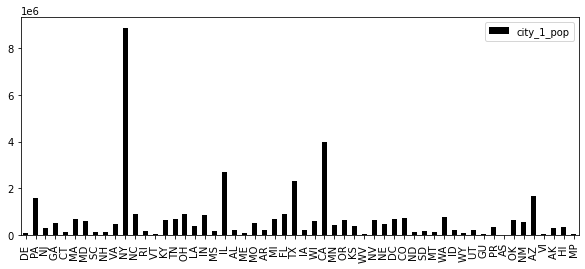

In [341]:
#9
facts9 = merged.sort_values(by = "Date")
plot = facts9[['city_1_pop','Abbreviation']].plot(kind='bar', figsize=(10,4), color='black')
plot.set_xticklabels(facts9['Abbreviation']);

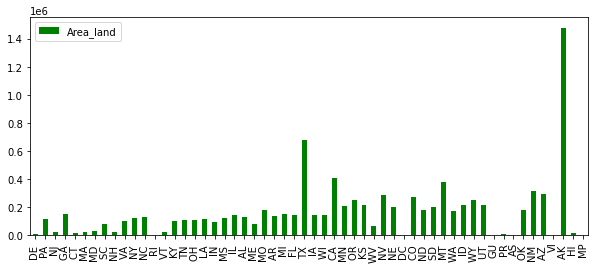

In [339]:
#10
facts9 = merged.sort_values(by = "Date")
plot = facts9[['Area_land','Abbreviation']].plot(kind='bar', figsize=(10,4), color='green')
plot.set_xticklabels(facts9['Abbreviation']);

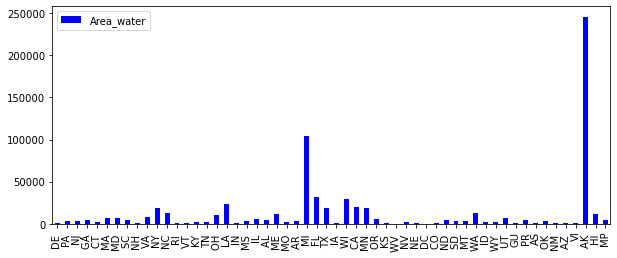

In [340]:
facts9 = merged.sort_values(by = "Date")
plot = facts9[['Area_water','Abbreviation']].plot(kind='bar', figsize=(10,4), color='blue')
plot.set_xticklabels(facts9['Abbreviation']);